# <center>Projet traitement de données</center>
### <center>Livrable Final </center>

![Image projet](https://zupimages.net/up/21/25/bkn7.png)

<div style="text-align:right">
<br/><br/>BRASSARD Adèle, DOITTÉE Anthime, FAVIER Paulin, JOLIVAT Antonin, LAMENDIN Pierre & VERNIER Nicolas
</div>

![Pierrot](https://zupimages.net/up/21/26/28h6.jpg)

## Sommaire  ##

Check 1 :
1. Sujet
2. Définition du problème
3. Réduction polynomiale
4. Étude de la complexité
5. Choix de l’algorithme
6. Modélisation de l’algorithme
7. Références

Réalisation du modèle prédictif : 
1. Explications
2. Importation des bibliothèques
3. Définition des fonctions 
4. Données du matin
5. Données du soir
6. Régression linéaire
7. Pertinence de la régression linéaire




## <center> Check 1 </center> ##

### 1. Sujet ###
#### 1.1 Projet CesiCDP ####
Le but de cette étude est de générer une tournée de livraison (problème du VRP). Le problème algorithmique consiste donc à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée. Cette optimisation devra tenir compte du trafic prévu sur chaque axe pour les différentes tranches horaires.

#### 1.2 Modélisation du problème ####
•	La définition du problème formel<br/>
•	L'étude de complexité de ce problème<br/>

#### 1.3 Modélisation de l'algorithme ####
•	La description de l'algorithme utilisé (la métaheuristique choisie et la modélisation du problème selon le formalisme de cette métaheuristique)<br/>
•	Le code Python implémentant ce modèle. Il ne s'agit pas d'implémenter l'algorithme, mais uniquement les structures de données sur lesquels il s'appuiera<br/>
•	Un modèle linéaire permettant, grâce à une résolution en nombre réels, d'obtenir une borne inférieure de la solution optimale. Cette borne servira dans le livrable suivant, pour étudier la qualité des solutions générées. Des bornes algorithmiques peuvent aussi être proposées. Dans cette partie, il n'est pas nécessaire de tenir compte des prévisions de trafic si le modèle devient trop complexe. 

#### 1.4 Remarques ####
Il est fortement recommandé d'intégrer à ce notebook des références bibliographiques vers des articles ou des ouvrages scientifiques.


### 2. Définition du problème ###
Le problème est ici de trouver un chemin adéquat pour une tournée de livraison. Nous avons plusieurs contraintes : <br/>
•	Le chemin doit être le plus court (en temps) possible<br/>
•	Le trafic routier doit être pris en compte<br/>
•	Retourner au point de départ<br/>
•	Le graphe représentant la carte doit être assez important (plus de 1000 sommets)<br/>


### 3. Réduction polynomiale ###
VRP sans contraintes, réductible au problème du voyageur de commerce :
	
Comme précisé dans le sujet du projet, ce problème est un VRP (Vehicle Routing Problem). Le but de ce problème, comme vu précédemment, est de trouver des itinéraires optimaux pour plusieurs véhicules visitant un ensemble d'emplacements.
Le problème du voyageur du commerce (TSP, Traveling Salesperson Problem), quant à lui, répond à la question « Compte tenu d'une liste de villes et des distances entre chaque paire de villes, quel est le trajet le plus court possible qui visite chaque ville exactement une fois et retourne à la ville d'origine ? ». 
Ainsi, comme on peut aisément le constater, le problème du VRP, lorsqu’il n’y a qu’un seul véhicule, est réductible au problème du TSP.


### 4. Étude de la complexité ###
#### 4.1 Formalisation du problème ####
Problème de décision :
Données : Un graphe G non orienté, M la somme des coûts qui minimise le trajet
Question : Est-ce que G admet un cycle inférieur ou égal à M ?
Nous nous intéresserons ici au problème du TSP (traveling salesman problem). Pour cela, on fixe les données suivantes : 
•	Un nombre de sommets d’un graphe non-orienté ;<br/>
•	Une matrice qui à chaque couple de sommets associe soit, soit un entier naturel, mesurant le coût pour passer sur l’arête ; <br/>
•	Une borne.
Le problème est de décider s’il existe un circuit (un chemin qui revient à son point de départ) passant exactement une fois par chacun des sommets et dont la somme des coûts est inférieure ou égale à. Nous allons montrer que ce problème est NP-complet.


#### 4.2 TSP est dans NP ####
Connaissant M la somme des coûts qui minimise le trajet. Si l’on nous donne un chemin correspondant à une solution valide, il est facile d’additionner les poids de chacune des arrêtes O(N) et de vérifier que le résultat est inférieur ou égal à M.

#### 4.3 Le circuit hamiltonien est dans NP ####
Tout comme pour le chemin hamiltonien, il est possible de vérifier une solution du circuit hamiltonien en un temps polynomial.

#### 4.4 Le circuit hamiltonien réductible au problème du voyageur de commerce ####
Le problème du circuit hamiltonien est le problème du voyageur du commerce avec un coût de 1 pour les arêtes présentes dans le graphe et une valeur arbitraire pour celles qui n’y sont pas. Cela peut être, par exemple +∞.

#### 4.5 Le problème du voyageur de commerce est NP-Complet ####
Nous supposons que le problème du circuit hamiltonien est NP-Complet. Ainsi, comme le circuit hamiltonien est réductible au problème du voyageur de commerce et que le voyageur de commerce est un problème NP, alors le problème du TSP est NP-Complet.

#### 4.6 VRP est donc NP-Complet ####
Etant donné que VRP sans contraintes est réductible au TSP et que nous avons prouvé que le problème du TSP était NP-Complet, nous pouvons en déduire que le VRP est aussi NP-Complet.


### 5. Choix de l’algorithme ###
#### 5.1 Il n’existe pas d’algorithme capable de trouver une solution optimale en temps polynomial ####
Comme nous l’avons vu dans la partie précédente, le problème du VRP est NP-Complet. Cela signifie donc qu’il fait partie de NP et donc que la résolution de ce problème ne peut, à l’heure actuelle, pas se faire en un temps polynomial. 
Ainsi, il n’existe pas de solution optimale pour la résolution du VRP.

#### 5.2 Utilisation d’un algorithme méta-heuristique : Optimisation de la colonie de fourmis (ACO) ####
Dans notre cas, nous avons donc choisi un algorithme métaheuristique. Un algorithme métaheuristique est un algorithme d’optimisation visant à résoudre des problèmes d’optimisation difficile (souvent issus des domaines de la recherche opérationnelle, de l'ingénierie ou de l'intelligence artificielle) pour lesquels on ne connaît pas de méthode classique plus efficace.
Parmi les recherches que nous avons réalisées, nous avons découvert de nombreux algorithmes de résolution du problème du VRP, comme nous pouvons le voir dans la Figure 1.
 
![Algorithmes de résolution du problème du VRP](https://zupimages.net/up/21/25/zffa.png)
<center>Figure 1. Algorithmes de résolution du problème du VRP</center>

Celui que nous avons choisi se nomme l’algorithme de colonies de fournis optimisé (ACO). Il se base sur la reproduction du comportement des fourmis lorsqu’elles recherchent de la nourriture, comme nous allons mieux le comprendre par la suite.


### 6. Modélisation de l’algorithme ###
#### 6.1 L’algorithme de colonies de fourmis ####
Les algorithmes de colonies de fourmis (ant colony optimization, ou ACO) sont des algorithmes inspirés du comportement des fourmis, ou d'autres espèces formant un superorganisme, et qui constituent une famille de métaheuristiques d’optimisation.

Un modèle expliquant ce comportement est le suivant :
1.	Une fourmi (appelée « éclaireuse ») parcourt plus ou moins au hasard l’environnement autour de la colonie ;
2.	Si celle-ci découvre une source de nourriture, elle rentre plus ou moins directement au nid, en laissant sur son chemin une piste de phéromones ;
3.	Ces phéromones étant attractives, les fourmis passant à proximité vont avoir tendance à suivre, de façon plus ou moins directe, cette piste ;
4.	En revenant au nid, ces mêmes fourmis vont renforcer la piste ;
5.	Si deux pistes sont possibles pour atteindre la même source de nourriture, celle étant la plus courte sera, dans le même temps, parcourue par plus de fourmis que la longue piste ;
6.	La piste courte sera donc de plus en plus renforcée, et donc de plus en plus attractive ;
7.	La longue piste, elle, finira par disparaître, les phéromones étant volatiles ;
8.	A terme, l’ensemble des fourmis a donc déterminé et « choisi » la piste la plus courte.

#### 6.2 Contrainte supplémentaire ####
En plus de cela, nous allons ajouter la contrainte suivante : k camions disponibles simultanément pour effectuer les livraisons. Le calcul de la tournée devra inclure l'affectation des objets (et donc des points de livraison) aux différents camions disponibles, et minimiser non plus le temps total, mais la date de retour du dernier camion à la base.


### 7. Références ###
•	David L. Applegate, Robert E. Bixby, Vasek Chvátal, and William J. Cook. The travelling salesman problem: a computational study. Princeton university press, 2007. ISBN 9780691129938. <br/>
•	Markus Bläser. A new approximation algorithm for the asymmetric TSP with triangle inequality. ACM Trans. Algorithms, 4(4): Art. 47, 15, 2008. ISSN 1549-6325. doi: 10.1145/1383369.1383378. <br/>
•	A. M. Frieze, G. Galbiati, and F. Maffioli. On the worst-case performance of some algorithms for the asymmetric traveling salesman problem. Networks, 12(1) :23–39, 1982. ISSN 0028- 3045. doi: 10.1002/net.3230120103. <br/>
•	Michael Machtey and Paul Young. An introduction to the general theory of algorithms. Computer science library, Theory of computation series. North-Holland, New York, 1978. ISBN 044400226X. <br/>
•	Sartaj Sahni and Teofilo Gonzalez. P-complete approximation problems. J. Assoc. Comput. Mach., 23(3) :555–565, 1976. ISSN 0004-5411.



# <center> Réalisation du modèle prédictif </center> #


## 1. Explications ##

Nous allons à présent étudier les données du trafics de notre base MongoDB. Le but est de pouvoir vérifier si ces données 
sont pertinentes. Il est possible de les qualifier de pertinantes si elles permettent de prédire de nouvelles données.

Nous avons un échantillon de données constitué de 500 arêtes. Celles-ci contiennent des données de trafic (nombre de véhicules) entre 7 heures et 9 heures le matin et entre 17 heures et 19 heures le soir.

Afin d'étudier nos données, nous avons choisi d'étudier l'arête la moins congestionnée, l'arête médiane et l'arête la plus congestionnée. Ce choix a pour objectif de récupérer l'échantillon le plus représentatif du trafic global.

Nous allons donc afficher ces 3 arêtes pour étudier la répartition des données.


## 2. Importation des bibliothèques ##

In [86]:
# Importation des différentes bibliothèques nécessaires au traitement des données

from pymongo import MongoClient
import math
import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
import pylab as py
from IPython.display import display, HTML

# Permet de centrer les graphes
display(HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
.summary{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

</style>
"""))

# Connexion à la base de données MongoDB

client = MongoClient('localhost', 27017)
db = client['rop']
collection_trafic_stamped = db['vehicules_stamped']

## 3. Définition des fonctions ##

In [52]:
# Récupération du nombre de véhicules par arête

def recuperer_nombre_vehicules_par_arete(plage_horaire):
    if (plage_horaire == "s"):
        lte = 19
        gte = 17
    elif (plage_horaire == "m"):
        lte = 9
        gte = 7
    else:
        lte=9
        gte=7
    vehicules_par_arete = list(db.vehicules_stamped.aggregate([
    {"$project":{"num_arete":1, "heures":{"$hour":"$date"}, "nb_vehicules":1}},
    {"$match":{"heures":{"$lte":lte, "$gte":gte}}},
    {"$group":{"_id":"$num_arete", 
               "nb_vehicules":{"$avg":"$nb_vehicules"}}},
    {"$sort":{"nb_vehicules":-1}}
    ]))
    return vehicules_par_arete


# Calcul de la somme du trafic

def somme_vehicule_trafic():
    dates = list(collection_trafic_stamped.distinct("date")) 
    vehicules_par_minutes = dict([(date.strftime("%H:%M"), 0) for date in dates]) 
    for trafic in collection_trafic_stamped.find():
        date = trafic["date"].strftime("%H:%M") 
        vehicules_par_minutes[date] += trafic["nb_vehicules"] 
    nb_jours = 5
    nb_data_points = nb_jours*len(collection_trafic_stamped.distinct("num_arete"))
    trafics = [vehicules_par_minutes[date]/nb_data_points for date in vehicules_par_minutes.keys()]
    return trafics
 
    
# Chargement des données par arête

def charger_données_vehicules_par_arete(arete,plage_horaire):
    if plage_horaire == "s":
        lte = 19
        gte = 17
    elif plage_horaire == "m":
        lte = 9
        gte = 7
    vehicules_arete_mediane = db.vehicules_stamped.aggregate([
    {"$match":{"num_arete":{"$eq":arete}}},
    {"$project":{"temps":{"heures":{"$hour":"$date"},
                          "minutes":{"$minute":"$date"}},
                "nb_vehicules":1}},
    {"$match":{"temps.heures":{"$lte":lte, "$gte":gte}}},
     {"$sort":{"temps":1}}])
    return vehicules_arete_mediane


# Affichage des données par arête

def afficher_donnees_arete(xs,ys,label):
    xs = [e for sub in zip(xs, xs, xs, xs, xs) for e in sub]  
    fig, ax = plt.subplots() 
    ax.xaxis.set_major_locator(mdates.HourLocator(interval = 1)) 
    ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval = 15)) 
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M')) 
    ax.set(title=label, xlabel="temps", ylabel="trafic") 
    ax.plot(xs,ys,"o") 

    
# Convertisseur de date

def convert_date_to_entier(xs,plage_horaire):
    xs = [e for sub in zip(xs, xs, xs, xs, xs) for e in sub]  
    if plage_horaire == "m":
        X = [(date.hour-7)*60+date.minute for date in xs]
    elif plage_horaire == "s":
        X = [(date.hour-17)*60+date.minute for date in xs]
    X = np.append(arr = np.ones((len(X), 1)).astype(int), values = np.array([X]).T, axis = 1) 
    return X


# Affichage de la régression
    
def afficher_regression(X,regressor_OLS,label):
    # Prédictions avec le modèle
    y_pred = regressor_OLS.params[0]+regressor_OLS.params[1]*X[:,1] 
    fig, ax = plt.subplots()
    # Affichage du nuage de points
    ax.scatter(X[:,1], ys, alpha=0.3) 
    ax.set(title=label, xlabel="Temps", ylabel="Trafic")
    # Affichage du nuage de points
    ax.plot(X[:,1], y_pred, linewidth=3) 
    plt.show()

    
# Génération de la régression linéaire
    
def generer_regression(X,ys):
    # Il est impossible de factoriser à cause d'un problème de librairie
    # Utilisation de la librairie statmodele afin d'effectuer la régression linéaire sur le modèle
    # Génération des dates
    # Entrainement du modèle
    reg =  sm.OLS(endog = ys, exog = X).fit() 
    return reg


# Affichage de la régression linéaire

def afficher_equation_regression(regressor_OLS):
    return str(round(regressor_OLS.params[1],2)) + "x + " + str(round(regressor_OLS.params[0],2))


# Affichage des P-Values

def print_pvalue(regressor_OLS):
    print('La P-Value du test de Goldfeld–Quandt est: ',
    sms.het_goldfeldquandt(ys, regressor_OLS.model.exog)[1]) 
    print('La P-Value du test de Breusch–Pagan est: ', 
    sms.het_breuschpagan(regressor_OLS.resid, 
    regressor_OLS.model.exog)[1]) 
    print('La P-Value du test de White est: ', 
    sms.het_white(regressor_OLS.resid**2,  
    regressor_OLS.model.exog)[1]) 

## 4. Données du matin ##

### 4.1 Chargement des données ###

In [3]:
# Chargement des données du matin de la base de données 

vehicules_par_arete = recuperer_nombre_vehicules_par_arete("m")
arete_max, arete_mediane, arete_min = vehicules_par_arete[0]["_id"], vehicules_par_arete[249]["_id"], vehicules_par_arete[-1]["_id"]


# Génération de l'axe des abscisses

xs = pd.date_range("2020-01-01 07:01", "2020-01-01 09:00", freq = "min").to_pydatetime().tolist()



### 4.2 Affichage des arêtes ###


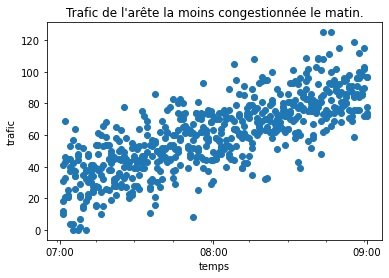

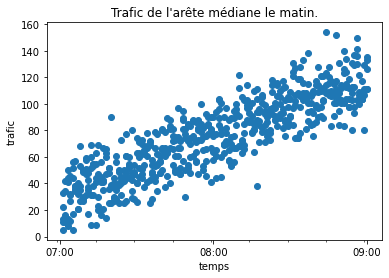

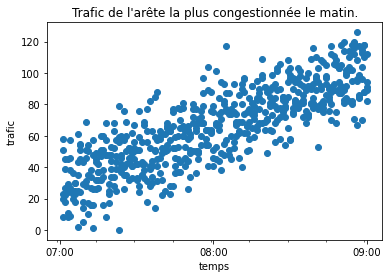

In [64]:
# Affichage de l'arête la moins congestionnée
# Chargement des données

donnees_plage_horaire_m = charger_données_vehicules_par_arete(arete_min,"m") # On donne l'id en entrée

ys = [trafic["nb_vehicules"] for trafic in donnees_plage_horaire_m] 
ys = ys[:600] 
afficher_donnees_arete(xs,ys,"Trafic de l'arête la moins congestionnée le matin.")


# Chargement des données de l'arête médiane pour le matin

donnees_plage_horaire_m = charger_données_vehicules_par_arete(arete_mediane,"m")
ys = [trafic["nb_vehicules"] for trafic in donnees_plage_horaire_m] 
ys = ys[:600] 
afficher_donnees_arete(xs,ys,"Trafic de l'arête médiane le matin.")


# Affichage de l'arête médiane

donnees_plage_horaire_m = charger_données_vehicules_par_arete(arete_max,"m")
ys = [trafic["nb_vehicules"] for trafic in donnees_plage_horaire_m] 
ys = ys[:600] 


# Affichage de l'arête la plus congestionnée

afficher_donnees_arete(xs,ys,"Trafic de l'arête la plus congestionnée le matin.")

## 5. Données du soir ##

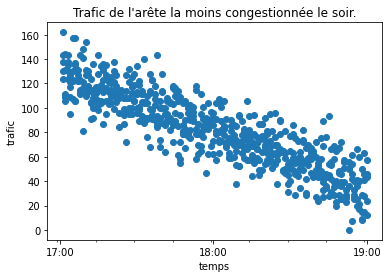

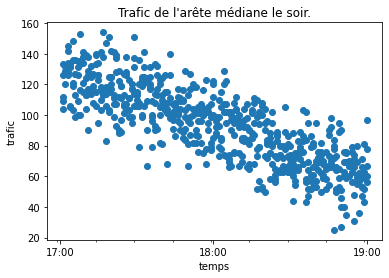

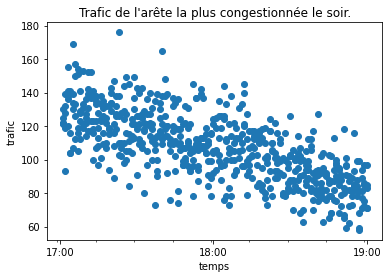

In [15]:
# Même chose pour les données du soir 

vehicules_par_arete = recuperer_nombre_vehicules_par_arete("s")
arete_max, arete_mediane, arete_min = vehicules_par_arete[0]["_id"], vehicules_par_arete[249]["_id"], vehicules_par_arete[-1]["_id"]


# Affichage de l'arête la moins congestionnée
# Chargement des données

donnees_plage_horaire_s = charger_données_vehicules_par_arete(arete_min,"s")


# Génération de l'axe des abscisses

xs = pd.date_range("2020-01-01 17:01", "2020-01-01 19:00", freq = "min").to_pydatetime().tolist()
ys = [trafic["nb_vehicules"] for trafic in donnees_plage_horaire_s] 
ys = ys[:600] 
afficher_donnees_arete(xs,ys,"Trafic de l'arête la moins congestionnée le soir.")


# Chargement des données de l'arête médiane pour le soir

donnees_plage_horaire_s = charger_données_vehicules_par_arete(arete_mediane,"s")
ys = [trafic["nb_vehicules"] for trafic in donnees_plage_horaire_s] 
ys = ys[:600] 


# Affichage de l'arête médiane

afficher_donnees_arete(xs,ys,"Trafic de l'arête médiane le soir.")

donnees_plage_horaire_s = charger_données_vehicules_par_arete(arete_max,"s")
ys = [trafic["nb_vehicules"] for trafic in donnees_plage_horaire_s] 
ys = ys[:600] 


# Affichage de l'arête la plus congestionnée

afficher_donnees_arete(xs,ys,"Trafic de l'arête la plus congestionnée le soir.")


Puisque le nombre de véhicules semble linéaire en fonction du temps, nous allons pouvoir calculer une régression linéaire. 

## 6. Régression linéaire ##

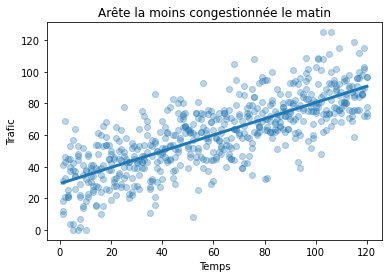

In [49]:
# Génération de x pour transformer l'abscisse en entiers (minute)

donnees_plage_horaire_m = charger_données_vehicules_par_arete(arete_min,"m") # On donne l'id en entrée
xs = pd.date_range("2020-01-01 07:01", "2020-01-01 09:00", freq = "min").to_pydatetime().tolist()
ys = [trafic["nb_vehicules"] for trafic in donnees_plage_horaire_m] 
ys = ys[:600] 

X = convert_date_to_entier(xs,"m")
regressor_matin = generer_regression(X,ys)
afficher_regression(X,regressor_matin,"Arête la moins congestionnée le matin")

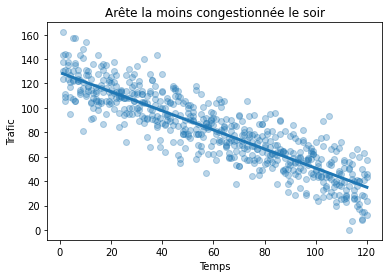

In [47]:
# Génération de x pour transformer l'abscisse en entiers (minute)

donnees_plage_horaire_s = charger_données_vehicules_par_arete(arete_min,"s") #on donne l'id en entrée
xs = pd.date_range("2020-01-01 17:01", "2020-01-01 19:00", freq = "min").to_pydatetime().tolist()
ys = [trafic["nb_vehicules"] for trafic in donnees_plage_horaire_s]
ys = ys[:600] 
X = convert_date_to_entier(xs,"s")
regressor_soir = generer_regression(X,ys)
afficher_regression(X,regressor_soir,"Arête la moins congestionnée le soir")

## 7. Pertinence de la régression linéaire ##

### 7.1 P-value du matin ###



On va a présent pouvoir étudier la pertinence de la regression linéaire grace au calcul de la p value. Ainsi, pour le matin, on aura :

In [28]:
print_pvalue(regressor_matin)

La P-Value du test de Goldfeld–Quandt est:  0.5305629705313416
La P-Value du test de Breusch–Pagan est:  0.31297448006324385
La P-Value du test de White est:  0.9334779081423424


### 7.2 P-Value du soir ###

Et pour le soir, la P-value sera : 

In [29]:
print_pvalue(regressor_soir)

La P-Value du test de Goldfeld–Quandt est:  0.5305629705313416
La P-Value du test de Breusch–Pagan est:  0.5466861811508161
La P-Value du test de White est:  0.5813710477989724


### 7.3 Normalité des résidus ### 

Nous allons à présent tester la normalité des résidus. 
Cette [courbe] permet de comparer les quantiles de la loi normale avec les quantiles de l'échantillon. Si les points s'alignent bien sur la droite $y=x$, cela constitue une indication que l'échantillon suit réellement une loi Normale.

#### 7.3.1 Normalité des résidus le matin ####

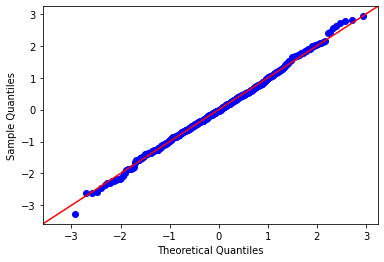

In [35]:
sm.qqplot(regressor_matin.resid_pearson, line ='45')
py.show()

#### 7.3.2 Normalité des résidus le soir ####

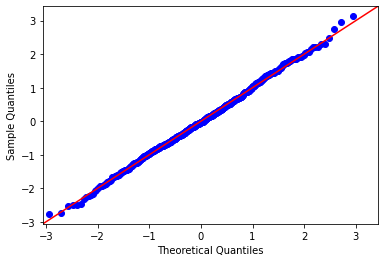

In [36]:
sm.qqplot(regressor_soir.resid_pearson, line ='45')
py.show()

Grâce à ces graphiques, nous pouvons remarquer que la répartition des résidus peut être modélisée par une loi normale. 

### 7.4 Tests de normalité ###

Pour en être sûrs, nous effectuons les tests de normalité de Jarque-Bera et de Shapiro-Wilk.


####  7.4.1 Test de normalité pour le matin ####

Ainsi on obtient les résultats suivants pour le matin :

In [34]:
print("Test de normalité du matin (Hypthèse 0 : Les données suivent une loi Normale.)")
print('La P-Value du test de Jarque-Bera est: ', 
      stats.jarque_bera(regressor_matin.resid)[1])
print('La P-Value du test de Shapiro-Wilk est: ', 
      stats.shapiro(regressor_matin.resid)[1])

Test de normalité (Hypthèse 0 : Les données suivent une loi Normale.)
La P-Value du test de Jarque-Bera est:  0.4553428641093562
La P-Value du test de Shapiro-Wilk est:  0.7455750107765198


#### 7.4.2 Test de normalité pour le soir ####

Et les résultats suivants pour le soir :

In [37]:
print("Test de normalité du soir (Hypthèse 0 : Les données suivent une loi Normale.)")
print('La P-Value du test de Jarque-Bera est: ', 
      stats.jarque_bera(regressor_soir.resid)[1])
print('La P-Value du test de Shapiro-Wilk est: ', 
      stats.shapiro(regressor_soir.resid)[1])

Test de normalité (Hypthèse 0 : Les données suivent une loi Normale.)
La P-Value du test de Jarque-Bera est:  0.7650446247214917
La P-Value du test de Shapiro-Wilk est:  0.8035983443260193


###  7.5 Tests de Fischer et Student ###

Pour nous assurer que le modèle capture globalement les variations dans les données, nous allons calculer le coefficient de détermination (R) ainsi qu'appliquer les tests de Fischer et de Student.

#### 7.5.1 Tests pour le matin ####
Nous évaluons la qualité de la regression lineaire en utilisant la classe statsmodels :

In [76]:
print("La valeur du R2 est ", regressor_matin.rsquared) 

La valeur du R2 est  0.5953706910833187


Les test de Fischer sur la qualité globale de la régression donnent le résultat suivant :

In [77]:
print("La f_value pour le matin vaut", regressor_matin.fvalue, " et la f_pvalue vaut", regressor_matin.f_pvalue)

La f_value pour le matin vaut 879.8959082352001  et la f_pvalue vaut 1.366681995053052e-119


Et les resultats des t-tests sont : 

In [78]:
print("Les p valeurs pour le matin valent ", regressor_matin.pvalues, " et les t valeurs valent ", regressor_matin.tvalues)

Les p valeurs pour le matin valent  [1.87845883e-091 1.36668200e-119]  et les t valeurs valent  [24.33774376 29.66303943]


![OLS](https://zupimages.net/up/21/26/psgr.png)

#### 7.5.2 Tests pour le soir ####
Nous évaluons la qualité de la régression lineaire en utilisant la classe statsmodels :

In [90]:
print("La valeur du R2 est ", regressor_soir.rsquared) 

La valeur du R2 est  0.7713054547459957


Les test de Fischer sur la qualité globale de la régression donnent le résultat suivant :

In [91]:
print("La f_value pour le soir vaut", regressor_soir.fvalue, " et la f_pvalue vaut", regressor_soir.f_pvalue)

La f_value pour le soir vaut 2016.8415535482886  et la f_pvalue vaut 9.706583013502534e-194


Et les resultats des t-tests sont :

In [92]:
print("Les p valeurs pour le soir valent ", regressor_soir.pvalues, " et les t valeurs valent ", regressor_soir.tvalues)

Les p valeurs pour le soir valent  [0.00000000e+000 9.70658301e-194]  et les t valeurs valent  [106.0611324  -44.90925911]


![OLSoir](https://zupimages.net/up/21/26/sljx.png)

### 7.6 Autocorrélation ###

#### 7.6.1 Autocorrélation du matin ####

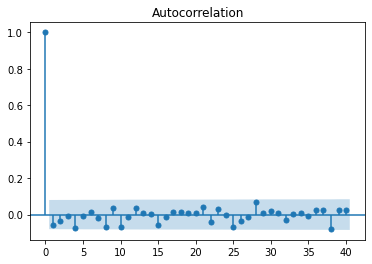

Résultat du test d'auto-corrélation du matin (Hypothèse 0 : Il n'y a pas d'autocorrélation.)
      lb_stat  lb_pvalue
1    0.328124   0.566766
2    0.356140   0.836884
3    1.426324   0.699376
4    1.511094   0.824674
5    2.976261   0.703646
6    4.326034   0.632646
7    4.366845   0.736686
8    4.366962   0.822591
9    6.792894   0.658672
10   6.997599   0.725672
11   7.979112   0.715174
12   8.086119   0.778365
13   8.087754   0.837837
14   9.473250   0.799593
15  10.009953   0.819113
16  10.097743   0.861474
17  10.125709   0.898256
18  11.421468   0.875624
19  12.559051   0.860360
20  12.862639   0.883199
21  13.224070   0.900573
22  13.632949   0.913993
23  13.942961   0.928493
24  14.060111   0.945281
25  14.171263   0.958664
26  14.282597   0.969086
27  15.147513   0.967312
28  15.474981   0.972973
29  15.523478   0.980491
30  15.724134   0.984959
31  15.727868   0.989603
32  17.298709   0.984018
33  17.680787   0.986467
34  17.927410   0.989285
35  18.328681   0.990856
36  20.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


In [39]:
from statsmodels.graphics import tsaplots

# Affichage de la fonction d'autocorrélation
fig = tsaplots.plot_acf(regressor_OLS.resid, lags=40)
plt.show()

print("Résultat du test d'auto-corrélation du matin (Hypothèse 0 : Il n'y a pas d'autocorrélation.)")
print(sm.stats.acorr_ljungbox(regressor_matin.resid, return_df=True))

#### 7.6.2 Autocorrélation du soir ####

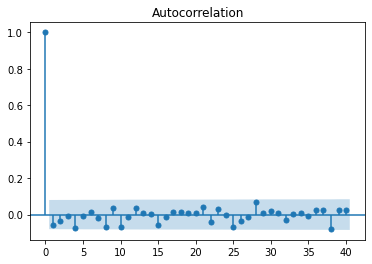

Résultat du test d'auto-corrélation du matin (Hypothèse 0 : Il n'y a pas d'autocorrélation.)
      lb_stat  lb_pvalue
1    1.605367   0.205144
2    2.001652   0.367576
3    4.336127   0.227381
4    4.339496   0.362005
5    4.360098   0.498817
6    4.547729   0.602981
7    5.956700   0.544814
8    6.225064   0.622037
9    6.629813   0.675599
10   7.973303   0.631445
11   8.168427   0.698142
12   8.169825   0.771722
13   9.133411   0.762795
14   9.453029   0.800982
15   9.487597   0.850675
16   9.649509   0.884280
17   9.892428   0.908061
18  10.033659   0.930802
19  10.056041   0.951550
20  10.144070   0.965484
21  10.262513   0.975298
22  10.730952   0.978379
23  11.732146   0.974399
24  12.126074   0.978450
25  13.998362   0.961761
26  17.642061   0.888405
27  17.684152   0.912877
28  17.697283   0.933519
29  20.306669   0.883139
30  20.784141   0.894516
31  21.112863   0.908901
32  21.528440   0.919438
33  21.814080   0.931663
34  22.829169   0.927407
35  23.257108   0.935573
36  23.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:531: FutureWarning: The default value of lags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setlags to silence this warning.
  warnings.warn("The default value of lags is changing.  After 0.12, "


In [40]:
from statsmodels.graphics import tsaplots

# Affichage de la fonction d'autocorrélation
fig = tsaplots.plot_acf(regressor_OLS.resid, lags=40)
plt.show()

print("Résultat du test d'auto-corrélation du matin (Hypothèse 0 : Il n'y a pas d'autocorrélation.)")
print(sm.stats.acorr_ljungbox(regressor_soir.resid, return_df=True))

On peut voir que les résultats des résidus sont bien corrélés entre eux. 

### 7.7 Génération de l'équation ###

Nous allons à présent génerer notre équation arrondie au centième.

#### 7.7.1 Equation du matin ####

In [55]:
print(afficher_equation_regression(regressor_matin))

0.51x + 29.3


L'équation affine est donc la suivante : $0,51x + 29,3$.

#### 7.7.2 Equation du soir ####

In [54]:
print(afficher_equation_regression(regressor_soir))

-0.78x + 128.92


L'équation affine est donc la suivante : $-0,78x + 128,9$.

### 7.8 Génération des données ###

In [56]:
# On peut donc génerer des données en fonction de l'heure (en indiquant le nombre de minutes)
# Ainsi pour le matin, on a :
def retourDonneeReductionMatin(minute):
    return 0.51*minute + 29.3

# Et pour le soir :
def retourDonneeReductionSoir(minute):
    return -0.78* minute + 128.92